In [68]:
# import libraires are crucial part to analyse, visualize data with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [69]:
las2 = lasio.read(r"C:/Users/manas/Downloads/ichthys_deep_1_wire_public_2010_sdb.las")
las2.curves

Only engine='normal' can read wrapped files


[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="", original_mnemonic="DEPTH", data.shape=(31083,)),
 CurveItem(mnemonic="AFEC", unit="1/S", value="", descr="=IFC(DEPTH>4962  ""  AFEC)", original_mnemonic="AFEC", data.shape=(31083,)),
 CurveItem(mnemonic="ANEC", unit="1/S", value="", descr="=IFC(DEPTH>4962  ""  ANEC)", original_mnemonic="ANEC", data.shape=(31083,)),
 CurveItem(mnemonic="APLC", unit="V/V", value="", descr="=IFC(DEPTH>4962  ""  APLC)", original_mnemonic="APLC", data.shape=(31083,)),
 CurveItem(mnemonic="BS", unit="IN", value="", descr="Values changed using TEXT_EDIT", original_mnemonic="BS", data.shape=(31083,)),
 CurveItem(mnemonic="CALI", unit="IN", value="", descr="Values changed using TEXT_EDIT", original_mnemonic="CALI", data.shape=(31083,)),
 CurveItem(mnemonic="DENS", unit="G/C3", value="", descr="Merged WIRE_J.RHOM_5 and WIRE_S4R1_EC_ORIG.RHOM_1 at 4854.35", original_mnemonic="DENS", data.shape=(31083,)),
 CurveItem(mnemonic="DENSC", unit="G/C3", value="",

In [70]:
data2 = las2.df()

In [71]:
data2 = data2.reset_index()

In [72]:
print(data2.columns)

Index(['DEPTH', 'AFEC', 'ANEC', 'APLC', 'BS', 'CALI', 'DENS', 'DENSC', 'DRH',
       'DT', 'DTCO', 'DTCO_C', 'DTSH', 'DTSM_C', 'FPLC', 'GR', 'HFK', 'HTHO',
       'HURA', 'NDS', 'NEUT', 'PEF', 'PR', 'PR_C', 'RESD', 'RESM', 'RESS',
       'RHOM', 'SIGF', 'TENS', 'VPVS', 'VPVS_C'],
      dtype='object')


In [73]:
data2['VP'] = 304800/ data2['DTCO_C']  # Calculate VP from DT
data2['VS'] = 304800/ data2['DTSH']  # Calculate VP from DT
data2['BS']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
31078    8.5
31079    8.5
31080    8.5
31081    8.5
31082    8.5
Name: BS, Length: 31083, dtype: float64

In [74]:
select = data2[['DEPTH', 'GR','RESD','RHOM','CALI','NEUT','RESS' ]]

In [75]:
select

,DEPTH,GR,RESD,RHOM,CALI,NEUT,RESS
0,233.1720,NaN,NaN,NaN,NaN,NaN,NaN
1,233.3244,NaN,NaN,NaN,NaN,NaN,NaN
2,233.4768,NaN,NaN,NaN,NaN,NaN,NaN
3,233.6292,NaN,NaN,NaN,NaN,NaN,NaN
4,233.7816,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31078,4969.4592,NaN,NaN,2.6681,NaN,NaN,NaN
31079,4969.6116,NaN,NaN,NaN,NaN,NaN,NaN
31080,4969.7640,NaN,NaN,NaN,NaN,NaN,NaN
31081,4969.9164,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
select.describe()

,DEPTH,GR,RESD,RHOM,CALI,NEUT,RESS
count,31083.000000,30738.000000,20292.000000,16460.000000,16610.000000,6116.000000,16471.000000
mean,2601.620400,53.722913,25.595466,2.519212,11.086007,0.121918,67.748477
std,1367.490312,46.702588,118.200874,0.131550,1.709022,0.065891,281.689262
min,233.172000,-0.207900,0.148000,1.501300,7.778700,0.008629,0.563400
25%,1417.396200,10.890400,0.750700,2.420900,9.010775,0.071016,0.864900
50%,2601.620400,39.860400,1.359850,2.502700,12.172200,0.113932,2.277800
75%,3785.844600,80.966250,6.096325,2.589200,12.232300,0.162620,12.487150
max,4970.068800,255.097800,1950.000000,3.239300,21.082300,0.609513,1950.000000


In [77]:
select.replace(-999.00000, np.nan)

,DEPTH,GR,RESD,RHOM,CALI,NEUT,RESS
0,233.1720,NaN,NaN,NaN,NaN,NaN,NaN
1,233.3244,NaN,NaN,NaN,NaN,NaN,NaN
2,233.4768,NaN,NaN,NaN,NaN,NaN,NaN
3,233.6292,NaN,NaN,NaN,NaN,NaN,NaN
4,233.7816,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31078,4969.4592,NaN,NaN,2.6681,NaN,NaN,NaN
31079,4969.6116,NaN,NaN,NaN,NaN,NaN,NaN
31080,4969.7640,NaN,NaN,NaN,NaN,NaN,NaN
31081,4969.9164,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
select.describe()

,DEPTH,GR,RESD,RHOM,CALI,NEUT,RESS
count,31083.000000,30738.000000,20292.000000,16460.000000,16610.000000,6116.000000,16471.000000
mean,2601.620400,53.722913,25.595466,2.519212,11.086007,0.121918,67.748477
std,1367.490312,46.702588,118.200874,0.131550,1.709022,0.065891,281.689262
min,233.172000,-0.207900,0.148000,1.501300,7.778700,0.008629,0.563400
25%,1417.396200,10.890400,0.750700,2.420900,9.010775,0.071016,0.864900
50%,2601.620400,39.860400,1.359850,2.502700,12.172200,0.113932,2.277800
75%,3785.844600,80.966250,6.096325,2.589200,12.232300,0.162620,12.487150
max,4970.068800,255.097800,1950.000000,3.239300,21.082300,0.609513,1950.000000


In [79]:
select.isnull().sum()

DEPTH        0
GR         345
RESD     10791
RHOM     14623
CALI     14473
NEUT     24967
RESS     14612
dtype: int64

In [80]:
# select['DENSC'].fillna(select['DENSC'].mean(),inplace=True)
select['GR'].fillna(select['GR'].mean(),inplace=True)
select['RESD'].fillna(select['RESD'].mean(),inplace=True)
select['RHOM'].fillna(select['RHOM'].mean(),inplace=True)
# select['DTSM_C'].fillna(select['DTSM_C'].mean(),inplace=True)
select['RESS'].fillna(select['RESS'].mean(),inplace=True)
select['NEUT'].fillna(select['NEUT'].mean(),inplace=True)
select['CALI'].fillna(select['CALI'].mean(),inplace=True)

C:\Users\manas\AppData\Local\Temp\ipykernel_9200\1347930583.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  select['GR'].fillna(select['GR'].mean(),inplace=True)
C:\Users\manas\AppData\Local\Temp\ipykernel_9200\1347930583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select['GR'].fillna(select['GR'].mean(),inplace=True)
C:\Users\mana

In [81]:
select.isnull().sum()

DEPTH    0
GR       0
RESD     0
RHOM     0
CALI     0
NEUT     0
RESS     0
dtype: int64

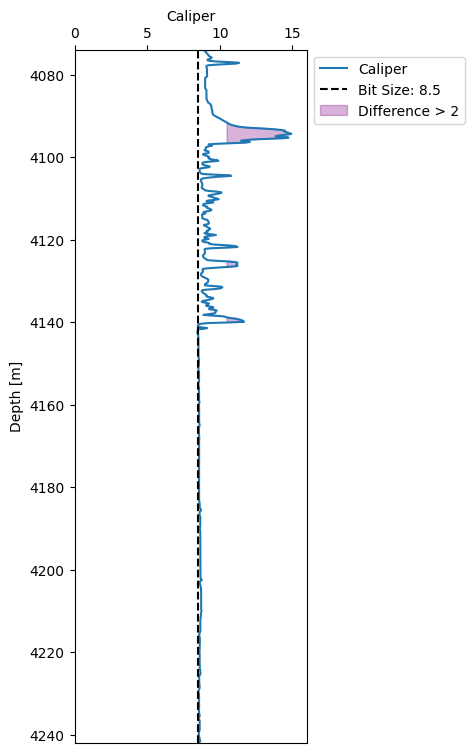

In [82]:
import matplotlib.pyplot as plt

# Calculate the difference between Caliper and Bit Size
caliper = select.CALI
bit_size = 8.5
difference = caliper - bit_size

plt.figure(1, figsize=(3, 9))
plt.subplot(111)
plt.plot(caliper, select['DEPTH'], label='Caliper')
plt.axvline(x=bit_size, color='black', linestyle='--', label='Bit Size: 8.5')
plt.ylim(4242, 4074)
plt.xlim(0, 16)
plt.xlabel('Caliper')
plt.ylabel('Depth [m]')

# Mark areas where the difference > 2
plt.fill_betweenx(select['DEPTH'], bit_size + 2, caliper, where=(difference > 2), color='purple', alpha=0.3, label='Difference > 2')

# Move x-axis to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Caliper.png', dpi=250, bbox_inches='tight')
plt.show()


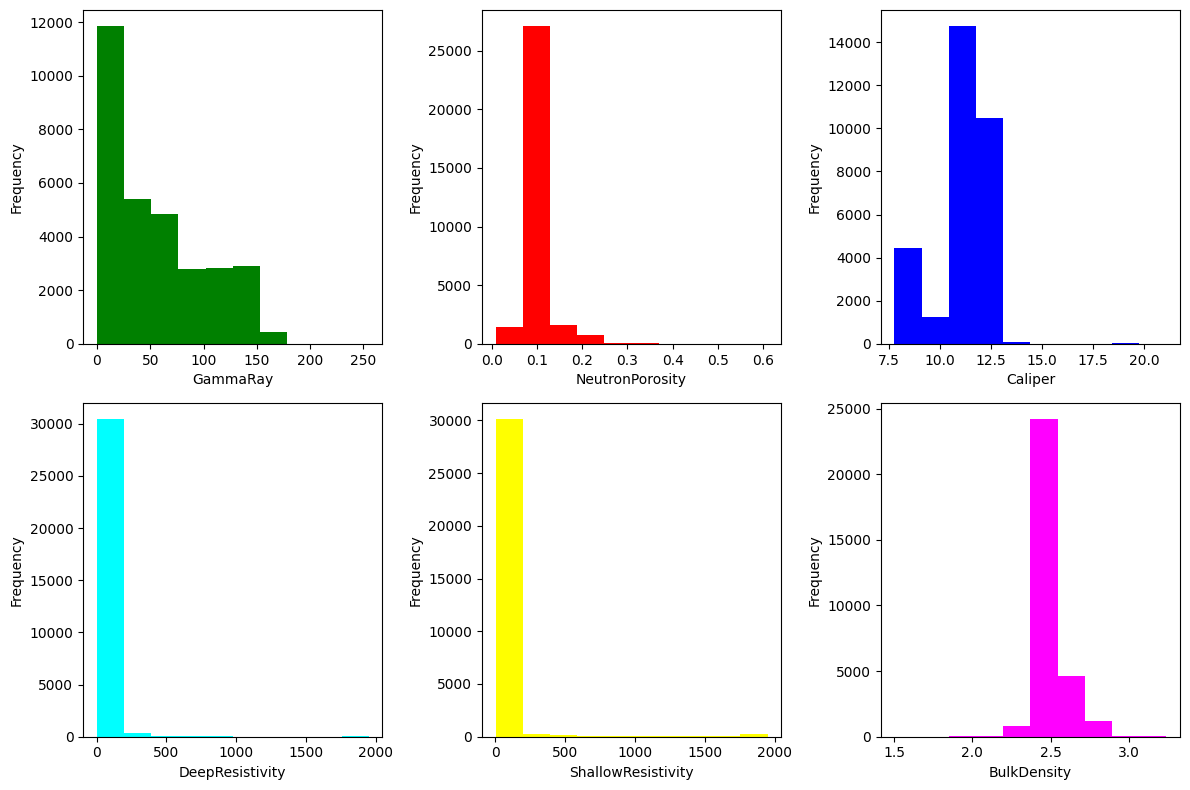

In [83]:
plt.figure(1, figsize=(12, 8))

plt.subplot(231)
plt.hist(select.GR, color='green')
plt.xlabel('GammaRay')
plt.ylabel('Frequency')

plt.subplot(232)
plt.hist(select.NEUT, color='red')
plt.xlabel('NeutronPorosity')
plt.ylabel('Frequency')

plt.subplot(233)
plt.hist(select.CALI, color='blue')
plt.xlabel('Caliper')
plt.ylabel('Frequency')

plt.subplot(234)
plt.hist(select.RESD,color='cyan')
plt.xlabel('DeepResistivity')
plt.ylabel('Frequency')

plt.subplot(235)
plt.hist(select.RESS,color='yellow')
plt.xlabel('ShallowResistivity')
plt.ylabel('Frequency')

plt.subplot(236)
plt.hist(select.RHOM,color='magenta')
plt.xlabel('BulkDensity')
plt.ylabel('Frequency')



# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('histogram.png', dpi=250)

plt.show()




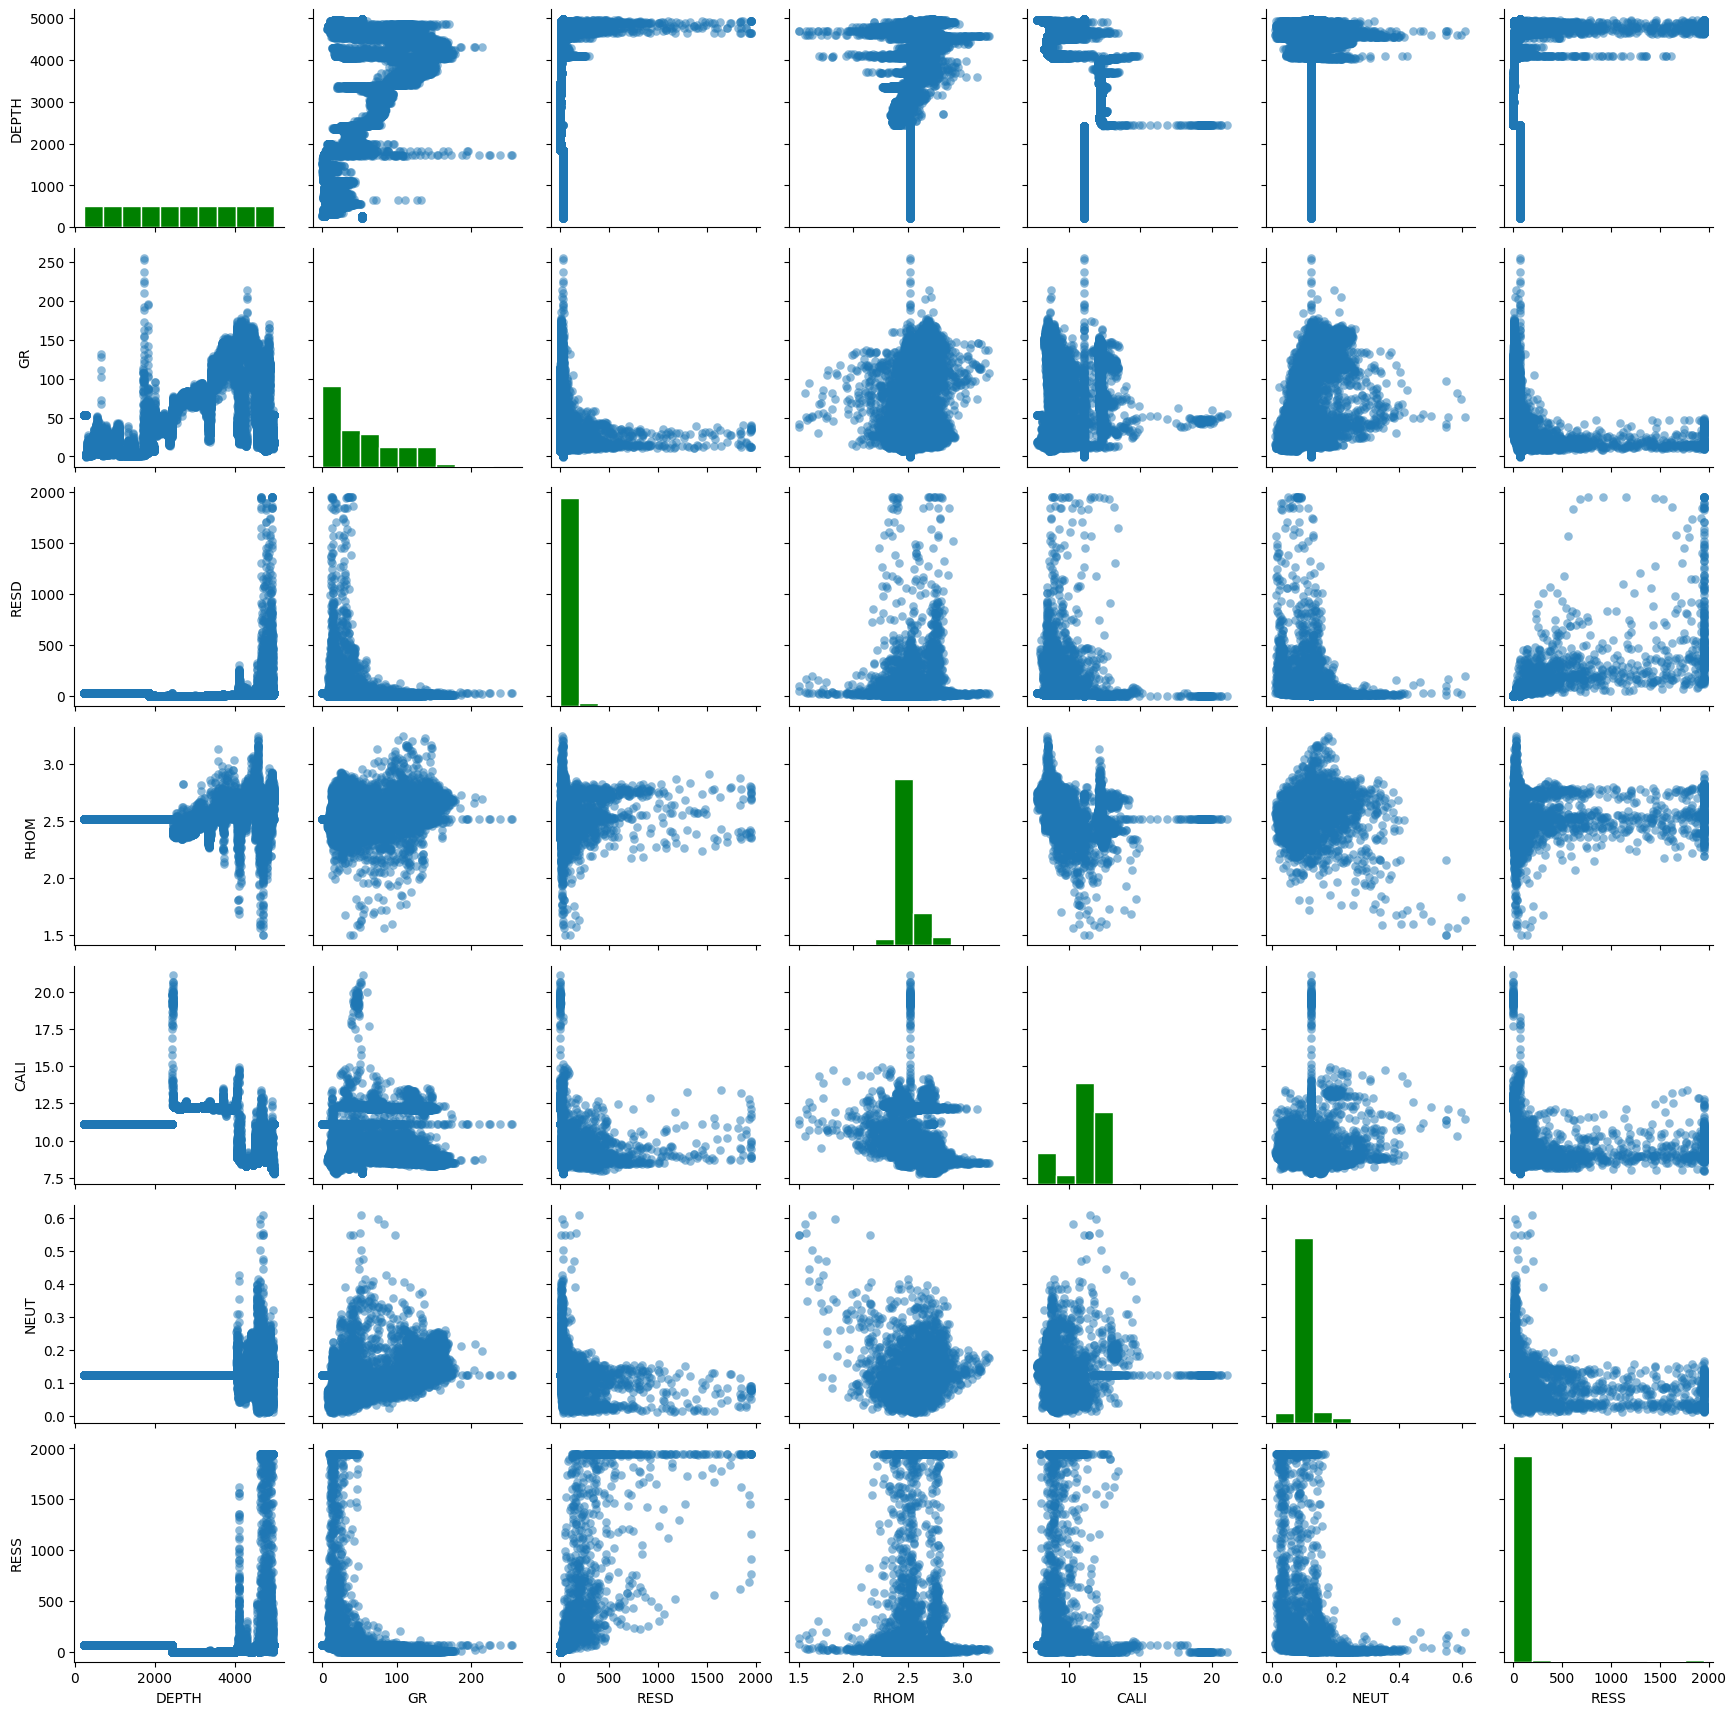

In [84]:
grid = sns.PairGrid(select )
grid.map_diag(plt.hist, color='green', edgecolor='w')
grid.map_offdiag(plt.scatter, linewidth=0.1, alpha=0.5)
plt.savefig('pairgrid.png', dpi=250)

In [85]:
# def calculate_Vclay(GR):
#     Vclay = (data2['GR'] - data2['GR'].min()) / (data2['GR'].max()-data2['GR'].min())
#     return Vclay
# data2['calculate_Vclay']= calculate_Vclay(data2[['GR']]) # we are using minimum of all clay estimatio2n
select2 = data2[['DEPTH','CALI','DT','GR','RHOM','RESS','RESD','NEUT','VP','VS']]
# select2.describe()
# data2['VPVS']
# select2.head()

In [86]:
select2['CALI'].fillna(select2['CALI'].mean(),inplace=True)
# select2['PR'].fillna(select2['PR'].mean(),inplace=True)
# select2['PR_C'].fillna(select2['PR_C'].mean(),inplace=True)
select2['GR'].fillna(select2['GR'].mean(),inplace=True)
select2['RHOM'].fillna(select2['RHOM'].mean(),inplace=True)
select2['RESS'].fillna(select2['RESS'].mean(),inplace=True)
select2['RESD'].fillna(select2['RESD'].mean(),inplace=True)
select2['NEUT'].fillna(select2['NEUT'].mean(),inplace=True)
# select2['calculate_Vclay'].fillna(select2['calculate_Vclay'].mean(),inplace=True)
select2.describe()

C:\Users\manas\AppData\Local\Temp\ipykernel_9200\724486320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  select2['CALI'].fillna(select2['CALI'].mean(),inplace=True)
C:\Users\manas\AppData\Local\Temp\ipykernel_9200\724486320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select2['CALI'].fillna(select2['CALI'].mean(),inplace=True)
C:\

,DEPTH,CALI,DT,GR,RHOM,RESS,RESD,NEUT,VP,VS
count,31083.000000,31083.000000,16320.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,16318.000000,15694.000000
mean,2601.620400,11.086007,91.422262,53.722913,2.519212,67.748477,25.595466,0.121918,3525.594778,1784.205482
std,1367.490312,1.249294,20.533537,46.442673,0.095728,205.051340,95.503203,0.029226,870.232138,667.853048
min,233.172000,7.778700,38.005000,-0.207900,1.501300,0.563400,0.148000,0.008629,2454.802005,964.668387
25%,1417.396200,11.086007,71.667375,11.115950,2.492900,2.101900,1.006500,0.121918,2728.459838,1169.872558
50%,2601.620400,11.086007,93.857350,40.500900,2.519212,67.748477,7.028300,0.121918,3247.344753,1646.970208
75%,3785.844600,12.175400,111.685600,80.513400,2.519212,67.748477,25.595466,0.121918,4259.185703,2222.316602
max,4970.068800,21.082300,124.482000,255.097800,3.239300,1950.000000,1950.000000,0.609513,7715.928278,3752.682466


In [87]:
tops = ('Torok','Pebble SH','Walakpa SS', 'J-Klingak','Barrow SS','Klingak SH','T-Sag River SS', 'Shublik','Basement')
tops_depths=(100,1701,2071,2087,2990, 3102,3224,3258,3633)

In [130]:
# call the triple combo function as defined
def triple_combo_log(top_depth,bottom_depth):
    
    logs=select2[(select2.DEPTH >= top_depth) & (select2.DEPTH <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,20) , sharey=True)
    fig.suptitle("Triple-combo Log display", fontsize=24)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    p_5=[logs['GR'].quantile(0.05)]
    p_95=[logs['GR'].quantile(0.95)]
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
#         for (i,j) in zip(tops_depths,tops):
#             if ((i>=top_depth) and (i<=bottom_depth)):
#                 axes.axhline(y=i, linewidth=0.5, color='black')
#                 axes.text(0.1, i ,j, horizontalalignment='center',
#                           verticalalignment='center')
#First track GR, CALI, SP logs to display
#         ax1 = ax[0].twiny()
#         ax1.set_xlim(-100,0)
#         ax1.spines['top'].set_position(('outward',0))
#         ax1.plot(logs.SP, logs.DEPTH, '-b', label= "SP (mV)")
#         ax1.set_xlabel('SP(mV)',color='b')    
#         ax1.tick_params(axis='x', colors='b')
#         ax1.grid(True)
        
        ax2 = ax[0].twiny()
        ax2.set_xlim(0, 16)
        ax2.spines['top'].set_position(('outward', 40))
        ax2.plot(logs.CALI, logs.DEPTH, '--b', label= "CALI (in)")
        ax2.set_xlabel('CALI(in)', color ='b')
        ax2.tick_params(axis='x', colors='b')
        
        ax3 = ax[0].twiny()
        ax3.set_xlim(0,250)
        ax3.spines['top'].set_position(('outward', 80))
        ax3.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
        ax3.axvline(x=p_5[0], label='Sand Line',color='k',ls='--', alpha=0.5)
        ax3.axvline(x=p_95[0], label='Shale Line',color='y',ls='--', alpha=0.5)
        ax3.set_xlabel('GR(API)', color= 'g')
        ax3.tick_params(axis='x', colors='g')
        ax3.legend()
        

# Second track resitivity plot
#         ax11 = ax[1].twiny()
#         ax11.set_xlim(0.1, 1000)
#         ax11.set_xscale('log')
#         ax11.grid(True)
#         ax11.spines['top'].set_position(('outward', 80))
#         ax11.plot(logs.ILD, logs.DEPTH, '-r', label="ILD (m.ohm)")
#         ax11.set_xlabel('ILD(m.ohm)', color = 'r')
#         ax11.tick_params(axis='x', colors='r')
        
         
        ax12 = ax[1].twiny()
        ax12.set_xlim(1, 10000)
        ax12.set_xscale('log')
        ax12.spines['top'].set_position(('outward', 80))
        ax12.plot(logs.RESD, logs.DEPTH, '-c', label= "RESD (m.ohm)")
        ax12.set_xlabel('RESD(m.ohm)', color= 'c')
        ax12.tick_params(axis='x', colors='c')
         
        ax13 = ax[1].twiny()
        ax13.set_xlim(1, 10000)
        ax13.set_xscale('log')
        ax13.spines['top'].set_position(('outward', 40))
        ax13.plot(logs.RESS, logs.DEPTH, '-y', label="RESS (m.ohm)")
        ax13.set_xlabel('RESS(m.ohm)', color = 'y')
        ax13.tick_params(axis='x', colors='y')
         
# Third track NPHI, RHO, DT display
#         ax21 = ax[2].twiny()
#         ax21.grid(True)
#         ax21.set_xlim(140,40)
#         ax21.spines['top'].set_position(('outward', 0))
#         ax21.plot(logs.DT, logs.DEPTH, '-b', label= "DT (us/ft)")
#         ax21.set_xlabel('DT(us/ft)', color= 'b')
#         ax21.tick_params(axis='x', colors= 'b')
        
         
        ax22 = ax[2].twiny()
        ax22.set_xlim(0, 0.6)
        ax22.invert_xaxis()
        ax22.spines['top'].set_position(('outward', 40))
        ax22.plot(logs.NEUT, logs.DEPTH, '--r', label = "NPHI (%)")
        ax22.set_xlabel('NPHI(v/v)', color = 'r')
        ax22.tick_params(axis= 'x', colors='r')
         
        ax23 = ax[2].twiny()
        ax23.set_xlim(1.5, 2.95)
        ax23.spines['top'].set_position(('outward', 80))
        ax23.plot(logs.RHOM, logs.DEPTH, '-m', label= "RHOB (g/cc)")
        ax23.set_xlabel('RHOM(g/cc)', color = 'm')
        ax23.tick_params(axis='x', colors= 'm')

In [131]:
# # Lets display the whole log at a glance
# triple_combo_log(select2.DEPTH.min(), select2.DEPTH.max())
# plt.savefig('Triple_combo_full_plot.png', dpi=250)

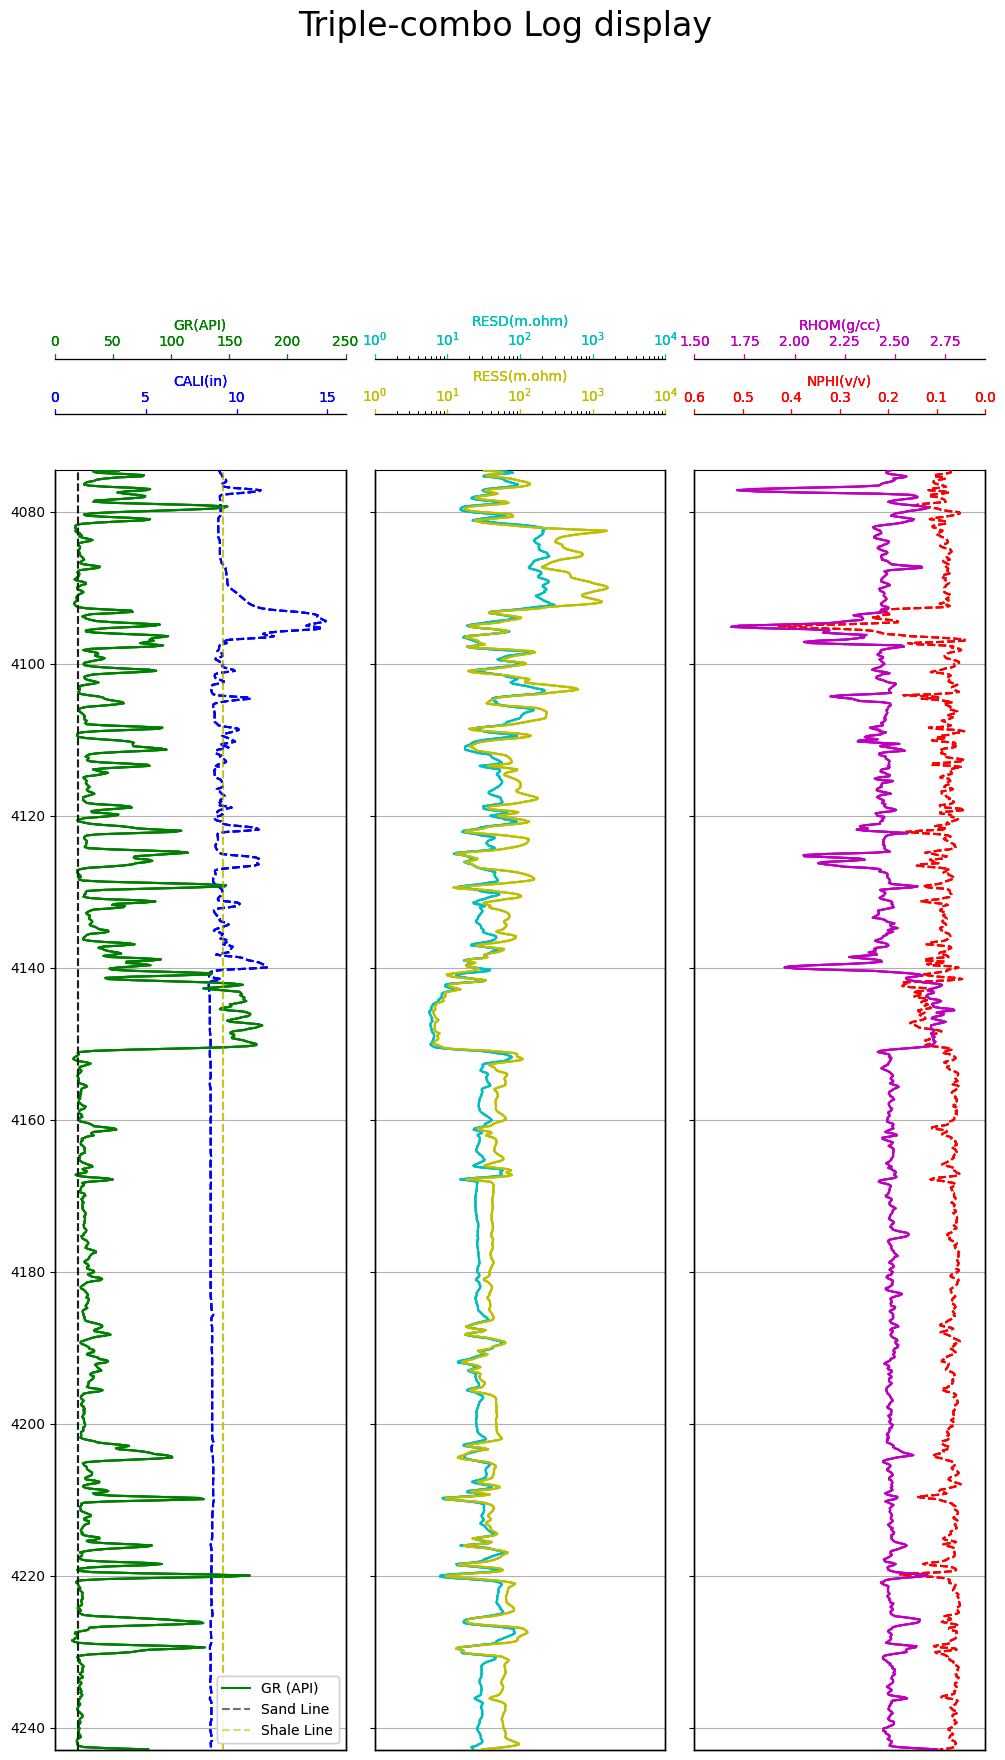

In [132]:
top_depth = 4242.9 
bottom_depth=4074.5
triple_combo_log(4074.5, 4242.9)
plt.savefig('Triple_combo_4074.5-4242.9.png', dpi=250)

In [91]:
# specific zone of interest for histogram creation
# logs['neu_log'] = data2['NEUT']  # Assuming NEUT is the neutron log
logs=select2[(select2.DEPTH >= bottom_depth) & (select2.DEPTH <= top_depth)]
logs

,DEPTH,CALI,DT,GR,RHOM,RESS,RESD,NEUT,VP,VS
25206,4074.5664,9.0372,65.8937,54.9105,2.4769,31.8819,34.2568,0.072963,4643.382723,2918.578553
25207,4074.7188,9.0646,66.0644,33.0923,2.4595,51.4400,65.9394,0.069979,4639.311775,2884.246883
25208,4074.8712,9.0941,65.4293,36.3583,2.4578,59.3276,79.7516,0.071461,4620.744231,2912.498901
25209,4075.0236,9.1467,65.8046,59.6827,2.4740,46.9596,54.3379,0.086945,4577.985716,2900.426309
25210,4075.1760,9.1971,65.6507,76.6474,2.5189,33.7485,32.8657,0.105558,4538.483301,2846.799592
...,...,...,...,...,...,...,...,...,...,...
26306,4242.2064,8.5791,63.9491,19.3224,2.4750,96.0600,26.1926,0.063091,4802.518486,2847.318168
26307,4242.3588,8.5907,64.5666,20.5530,2.4746,80.6768,24.9608,0.064700,4779.834368,2815.548330
26308,4242.5112,8.5784,65.3963,24.6420,2.5150,61.9548,21.4429,0.063109,4734.735217,2693.136214
26309,4242.6636,8.5619,66.5163,45.5051,2.6013,44.1234,22.1056,0.071391,4678.872465,2582.138346


In [92]:
def PHIDE(rho_log, rho_matrix, rho_fluid, rho_clay):
    PHID = (rho_matrix - rho_log) / (rho_matrix - rho_fluid)
    return PHID
#     PHID_clay = (rho_matrix - rho_clay) / (rho_matrix - rho_fluid)
#     PHID_clay_corr = PHID - Vclay * PHID_clay
#     return PHID_clay_corr

# def PHINE(neu_log, neu_clay, Vclay):
#     neu_log = neu_log - 0.028
#     PHIN_clay_corr = neu_log - (neu_clay * Vclay)
#     return PHIN_clay_corr

def PHIEXND(PHIDE, PHINE): #for oil n water bearing
    PHI_ND = (PHIDE + PHINE) / 2.0
    return PHI_ND

def PHIEXND_gas_corr(PHIDE, PHINE): #for gas bearing
    PHIEXND_gas_corr = ((PHIDE**2 + PHINE**2) / 2) ** 0.5
    return PHIEXND_gas_corr


In [93]:
# Compute porosity based on supplied values of matrix, fluid and clay property
dt_matrix, dt_fluid, dt_clay, alpha = 55.6, 189, 110, 5/8
Bcp = 110/100
rho_matrix, rho_fluid, rho_clay = 2.65, 1.1, 2.4
neu_clay = 45

# logs['neu_log'] = logs['NEUT']  # Assuming NEUT is the neutron log
# PHIDT_clay(rho_matrix, rho_fluid, rho_clay)
# PHIST_clay(dt_matrix, dt_fluid, dt_clay)

# Calculate Total porosity and Effective porosity by looping though pandas

# logs['PHIDT'] = PHIDT(logs.RHOB, rho_matrix, rho_fluid)
logs['PHIDE'] = PHIDE(logs.RHOM, rho_matrix, rho_fluid, rho_clay).clip(0,1)

# Sonic logs
# logs['PHIST']= PHIST(logs.DT, dt_matrix, dt_fluid, dt_clay)
# logs['PHISE_W'] = PHISE_W(logs.DT, dt_matrix, dt_fluid, Bcp, logs.Vclay, dt_clay).clip(0,1)

# logs['PHIST_rhg']= PHIST_rhg(logs.DT, dt_matrix, alpha, dt_clay)
# logs['PHISE_rhg'] = PHISE_rhg(logs.DT, dt_matrix, logs.Vclay, alpha, dt_clay).clip(0,1)

# Neutron logs
logs['PHINE'] = logs['NEUT']

# ND dual
logs['PHIEXND'] = PHIEXND(logs.PHIDE, logs.PHINE/100).clip(0,1)
logs['PHIEXND_gas_cor'] = PHIEXND_gas_corr(logs.PHIDE, logs.PHINE/100).clip(0,1)

# logs['PHINE']
# logs['PR']
# logs['calculate_Vclay']
# PHINE(0.169287,45,0.166737)


C:\Users\manas\AppData\Local\Temp\ipykernel_9200\3375963185.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['PHIDE'] = PHIDE(logs.RHOM, rho_matrix, rho_fluid, rho_clay).clip(0,1)
C:\Users\manas\AppData\Local\Temp\ipykernel_9200\3375963185.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['PHINE'] = logs['NEUT']
C:\Users\manas\AppData\Local\Temp\ipykernel_9200\3375963185.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [94]:
# def calculate_Vclay(VPVS, VP_matrix=2500, VP_fluid=1500):
#     Vclay = (VPVS - VP_matrix) / (VPVS - VP_fluid)
#     return Vclay
# data2['calculate_Vclay']= data2[['VPVS']].min(axis=1) # we are using minimum of all clay estimatio2n

In [95]:
logs.head()

,DEPTH,CALI,DT,GR,RHOM,RESS,RESD,NEUT,VP,VS,PHIDE,PHINE,PHIEXND,PHIEXND_gas_cor
25206,4074.5664,9.0372,65.8937,54.9105,2.4769,31.8819,34.2568,0.072963,4643.382723,2918.578553,0.111677,0.072963,0.056204,0.078970
25207,4074.7188,9.0646,66.0644,33.0923,2.4595,51.4400,65.9394,0.069979,4639.311775,2884.246883,0.122903,0.069979,0.061802,0.086907
25208,4074.8712,9.0941,65.4293,36.3583,2.4578,59.3276,79.7516,0.071461,4620.744231,2912.498901,0.124000,0.071461,0.062357,0.087683
25209,4075.0236,9.1467,65.8046,59.6827,2.4740,46.9596,54.3379,0.086945,4577.985716,2900.426309,0.113548,0.086945,0.057209,0.080293
25210,4075.1760,9.1971,65.6507,76.6474,2.5189,33.7485,32.8657,0.105558,4538.483301,2846.799592,0.084581,0.105558,0.042818,0.059812


C:\Users\manas\AppData\Local\Temp\ipykernel_9200\1305828580.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


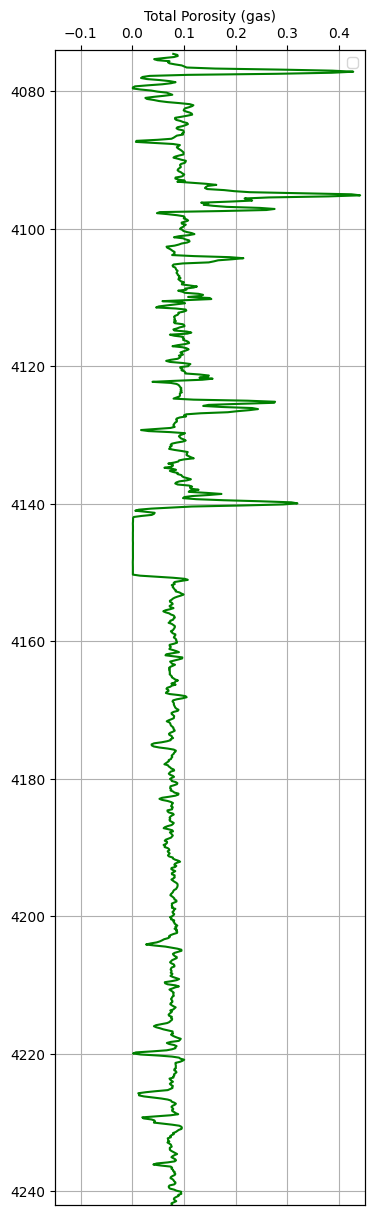

In [96]:
import matplotlib.pyplot as plt

# Assuming select2 is a DataFrame with Total_Porosity and DEPTH columns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,15), sharey=True)
# fig.suptitle("Porosity estimation", fontsize=22)

# Setting properties for the single subplot
ax.set_ylim(4074, 4242)
ax.invert_yaxis()
ax.yaxis.grid(True)
ax.get_xaxis().set_visible(False)

# Total porosity log
ax1 = ax.twiny()
ax1.set_ylabel('Depth [ft]')
ax1.set_xlim(-0.15, 0.45)
ax1.spines['top'].set_position(('outward', 0))
ax1.set_xlabel('Total Porosity (gas)', color='k')
ax1.tick_params(axis='x', colors='k')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting Total Porosity
ax1.plot(logs['PHIEXND_gas_cor'], logs['DEPTH'], label='Total Porosity', color='g')

plt.savefig('Total porosity GAS', dpi=250)
plt.show()

C:\Users\manas\AppData\Local\Temp\ipykernel_9200\4218558284.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


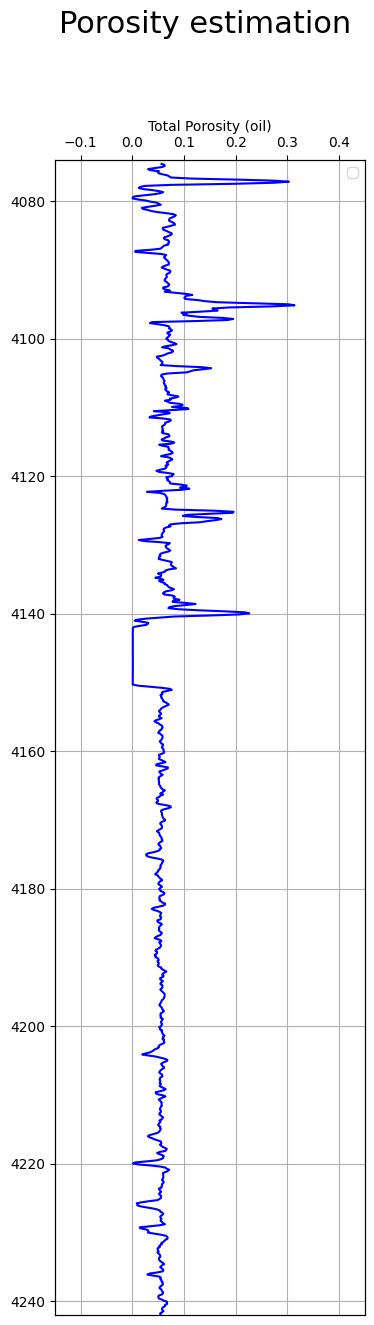

In [97]:
import matplotlib.pyplot as plt

# Assuming select2 is a DataFrame with Total_Porosity and DEPTH columns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,15), sharey=True)
fig.suptitle("Porosity estimation", fontsize=22)

# Setting properties for the single subplot
ax.set_ylim(4074, 4242)
ax.invert_yaxis()
ax.yaxis.grid(True)
ax.get_xaxis().set_visible(False)

# Total porosity log
ax1 = ax.twiny()
ax1.set_ylabel('Depth [ft]')
ax1.set_xlim(-0.15, 0.45)
ax1.spines['top'].set_position(('outward', 0))
ax1.set_xlabel('Total Porosity (oil)', color='k')
ax1.tick_params(axis='x', colors='k')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting Total Porosity
ax1.plot(logs['PHIEXND'], logs['DEPTH'], label='Total Porosity', color='blue')
plt.savefig('Total porosity OIL', dpi=250)

plt.show()


In [98]:
logs.columns

Index(['DEPTH', 'CALI', 'DT', 'GR', 'RHOM', 'RESS', 'RESD', 'NEUT', 'VP', 'VS',
       'PHIDE', 'PHINE', 'PHIEXND', 'PHIEXND_gas_cor'],
      dtype='object')

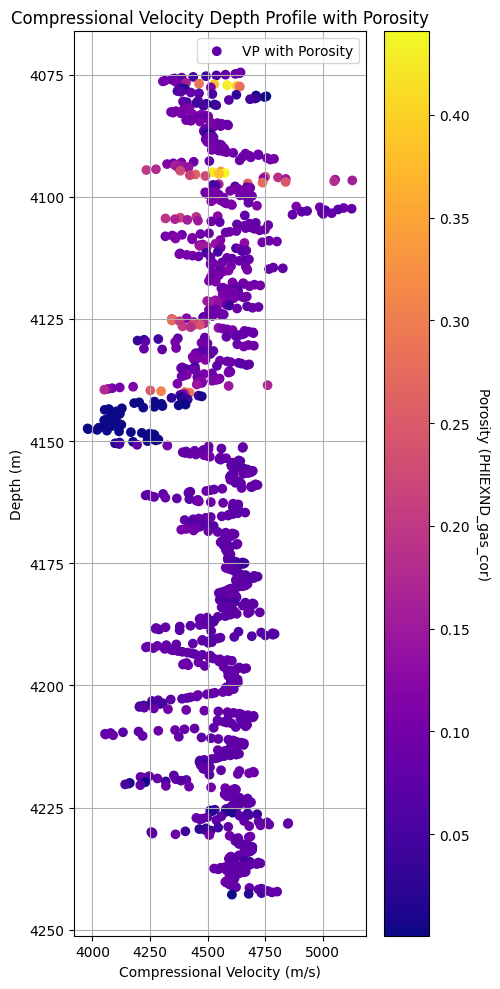

In [99]:

fig, ax = plt.subplots(figsize=(5, 10))

scatter = ax.scatter(logs['VP'], logs['DEPTH'], c=logs['PHIEXND_gas_cor'], cmap='plasma', label='VP with Porosity')
ax.set_xlabel('Compressional Velocity (m/s)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Porosity (PHIEXND_gas_cor)', rotation=270, labelpad=15)

plt.title("Compressional Velocity Depth Profile with Porosity")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.savefig('Compressional Velocity Depth Profile with Porosity', dpi=250)

plt.show()


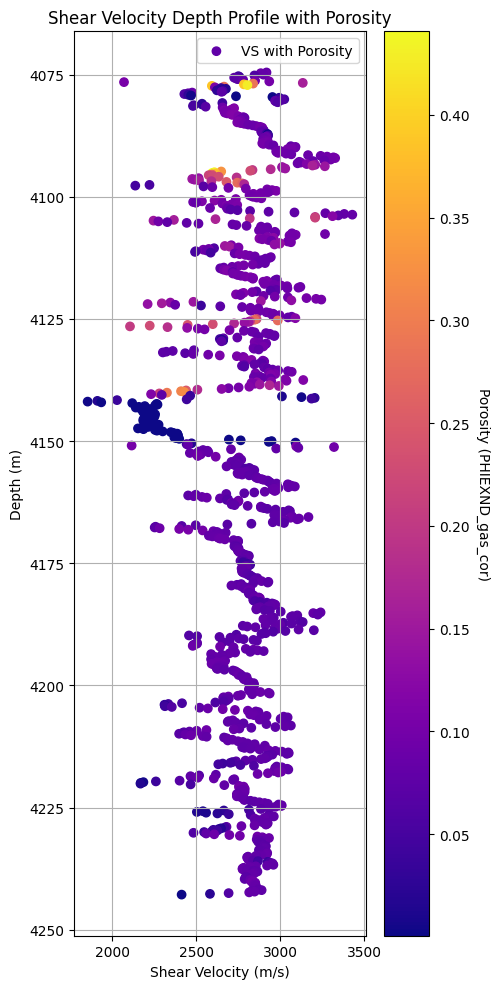

In [100]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 10))

# Plotting Shear Velocity (VS)
scatter = ax.scatter(logs['VS'], logs['DEPTH'], c=logs['PHIEXND_gas_cor'], cmap='plasma', label='VS with Porosity')
ax.set_xlabel('Shear Velocity (m/s)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

# Create a color bar for Porosity (PHIEXND_gas_cor)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Porosity (PHIEXND_gas_cor)', rotation=270, labelpad=15)

# Set title, legend, and grid
plt.title("Shear Velocity Depth Profile with Porosity")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.savefig('Shear Velocity Depth Profile with Porosity', dpi=250)
plt.show()


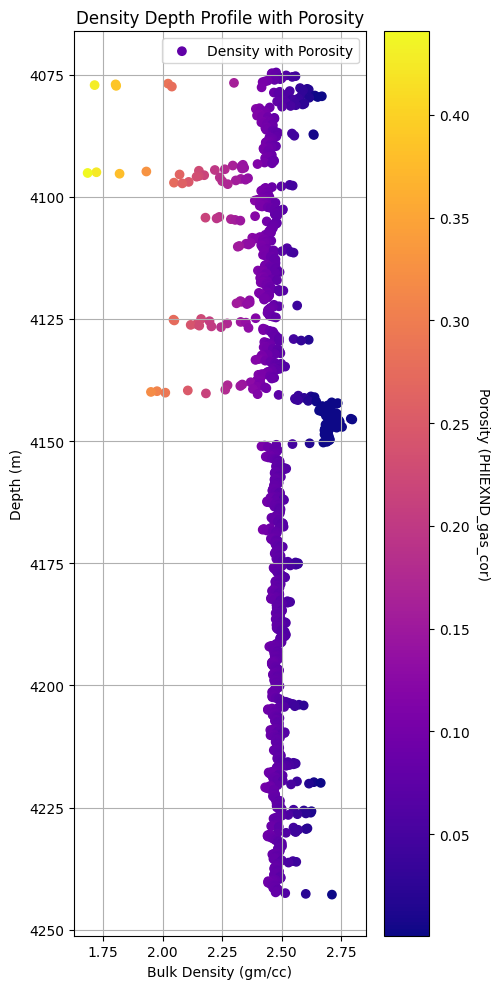

In [101]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 10))

# Plotting Shear Velocity (VS)
scatter = ax.scatter(logs['RHOM'], logs['DEPTH'], c=logs['PHIEXND_gas_cor'], cmap='plasma', label='Density with Porosity')
ax.set_xlabel('Bulk Density (gm/cc)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

# Create a color bar for Porosity (PHIEXND_gas_cor)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Porosity (PHIEXND_gas_cor)', rotation=270, labelpad=15)

# Set title, legend, and grid
plt.title("Density Depth Profile with Porosity")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.savefig('Density Depth Profile with Porosity', dpi=250)
plt.show()

In [107]:
logs.columns

Index(['DEPTH', 'CALI', 'DT', 'GR', 'RHOM', 'RESS', 'RESD', 'NEUT', 'VP', 'VS',
       'PHIDE', 'PHINE', 'PHIEXND', 'PHIEXND_gas_cor'],
      dtype='object')

In [135]:
# call the triple combo function as defined
def triple_combo_zone(top_depth,bottom_depth):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,20) , sharey=True)
    fig.suptitle("Triple-combo Log display", fontsize=24)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    p_5=[logs['GR'].quantile(0.05)]
    p_95=[logs['GR'].quantile(0.95)]
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
#         for (i,j) in zip(tops_depths,tops):
#             if ((i>=top_depth) and (i<=bottom_depth)):
#                 axes.axhline(y=i, linewidth=0.5, color='black')
#                 axes.text(0.1, i ,j, horizontalalignment='center',
#                           verticalalignment='center')
#First track GR, CALI, SP logs to display
#         ax1 = ax[0].twiny()
#         ax1.set_xlim(-100,0)
#         ax1.spines['top'].set_position(('outward',0))
#         ax1.plot(logs.SP, logs.DEPTH, '-b', label= "SP (mV)")
#         ax1.set_xlabel('SP(mV)',color='b')    
#         ax1.tick_params(axis='x', colors='b')
#         ax1.grid(True)
        
        # ax2 = ax[0].twiny()
        # ax2.set_xlim(0, 16)
        # ax2.spines['top'].set_position(('outward', 40))
        # ax2.plot(logs.CALI, logs.DEPTH, '--b', label= "CALI (in)")
        # ax2.set_xlabel('CALI(in)', color ='b')
        # ax2.tick_params(axis='x', colors='b')
        
        ax3 = ax[0].twiny()
        ax3.set_xlim(0,250)
        ax3.spines['top'].set_position(('outward', 0))
        ax3.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
        ax3.set_xlabel('GR(API)', color= 'g')
        ax3.tick_params(axis='x', colors='g')
        

# Second track resitivity plot
#         ax11 = ax[1].twiny()
#         ax11.set_xlim(0.1, 1000)
#         ax11.set_xscale('log')
#         ax11.grid(True)
#         ax11.spines['top'].set_position(('outward', 80))
#         ax11.plot(logs.ILD, logs.DEPTH, '-r', label="ILD (m.ohm)")
#         ax11.set_xlabel('ILD(m.ohm)', color = 'r')
#         ax11.tick_params(axis='x', colors='r')
        
         
        ax12 = ax[1].twiny()
        # ax12.set_xlim(-1, 4.5)
        ax12.set_xscale('log')
        # ax12.invert_xaxis()
        ax12.spines['top'].set_position(('outward', 40))
        ax12.plot(logs.NEUT, logs.DEPTH, '-r', label= "NPHI (v/v)")
        ax12.set_xlabel('NPHI(v/v)', color= 'r')
        ax12.tick_params(axis='x', colors='r')
         
        ax13 = ax[1].twiny()
        # ax13.set_xlim(-1, 4.5)
        # ax13.invert_xaxis()
        ax13.set_xscale('log')
        ax13.spines['top'].set_position(('outward', 0))
        ax13.plot(logs.PHIEXND_gas_cor, logs.DEPTH, '-y', label="Desnisty Porosity (v/v)")
        ax13.set_xlabel('DPHI(v/v)', color = 'y')
        ax13.tick_params(axis='x', colors='y')
         
# Third track NPHI, RHO, DT display
#         ax21 = ax[2].twiny()
#         ax21.grid(True)
#         ax21.set_xlim(140,40)
#         ax21.spines['top'].set_position(('outward', 0))
#         ax21.plot(logs.DT, logs.DEPTH, '-b', label= "DT (us/ft)")
#         ax21.set_xlabel('DT(us/ft)', color= 'b')
#         ax21.tick_params(axis='x', colors= 'b')
        
         
        ax22 = ax[2].twiny()
        ax22.set_xlim(0, 0.6)
        ax22.invert_xaxis()
        ax22.spines['top'].set_position(('outward', 0))
        ax22.plot(logs.NEUT, logs.DEPTH, '--r', label = "NPHI (%)")
        ax22.set_xlabel('NPHI(%)', color = 'r')
        ax22.tick_params(axis= 'x', colors='r')
         
        ax23 = ax[2].twiny()
        ax23.set_xlim(1.5, 2.95)
        ax23.spines['top'].set_position(('outward', 40))
        ax23.plot(logs.RHOM, logs.DEPTH, '-m', label= "RHOB (g/cc)")
        ax23.set_xlabel('RHOM(g/cc)', color = 'm')
        ax23.tick_params(axis='x', colors= 'm')

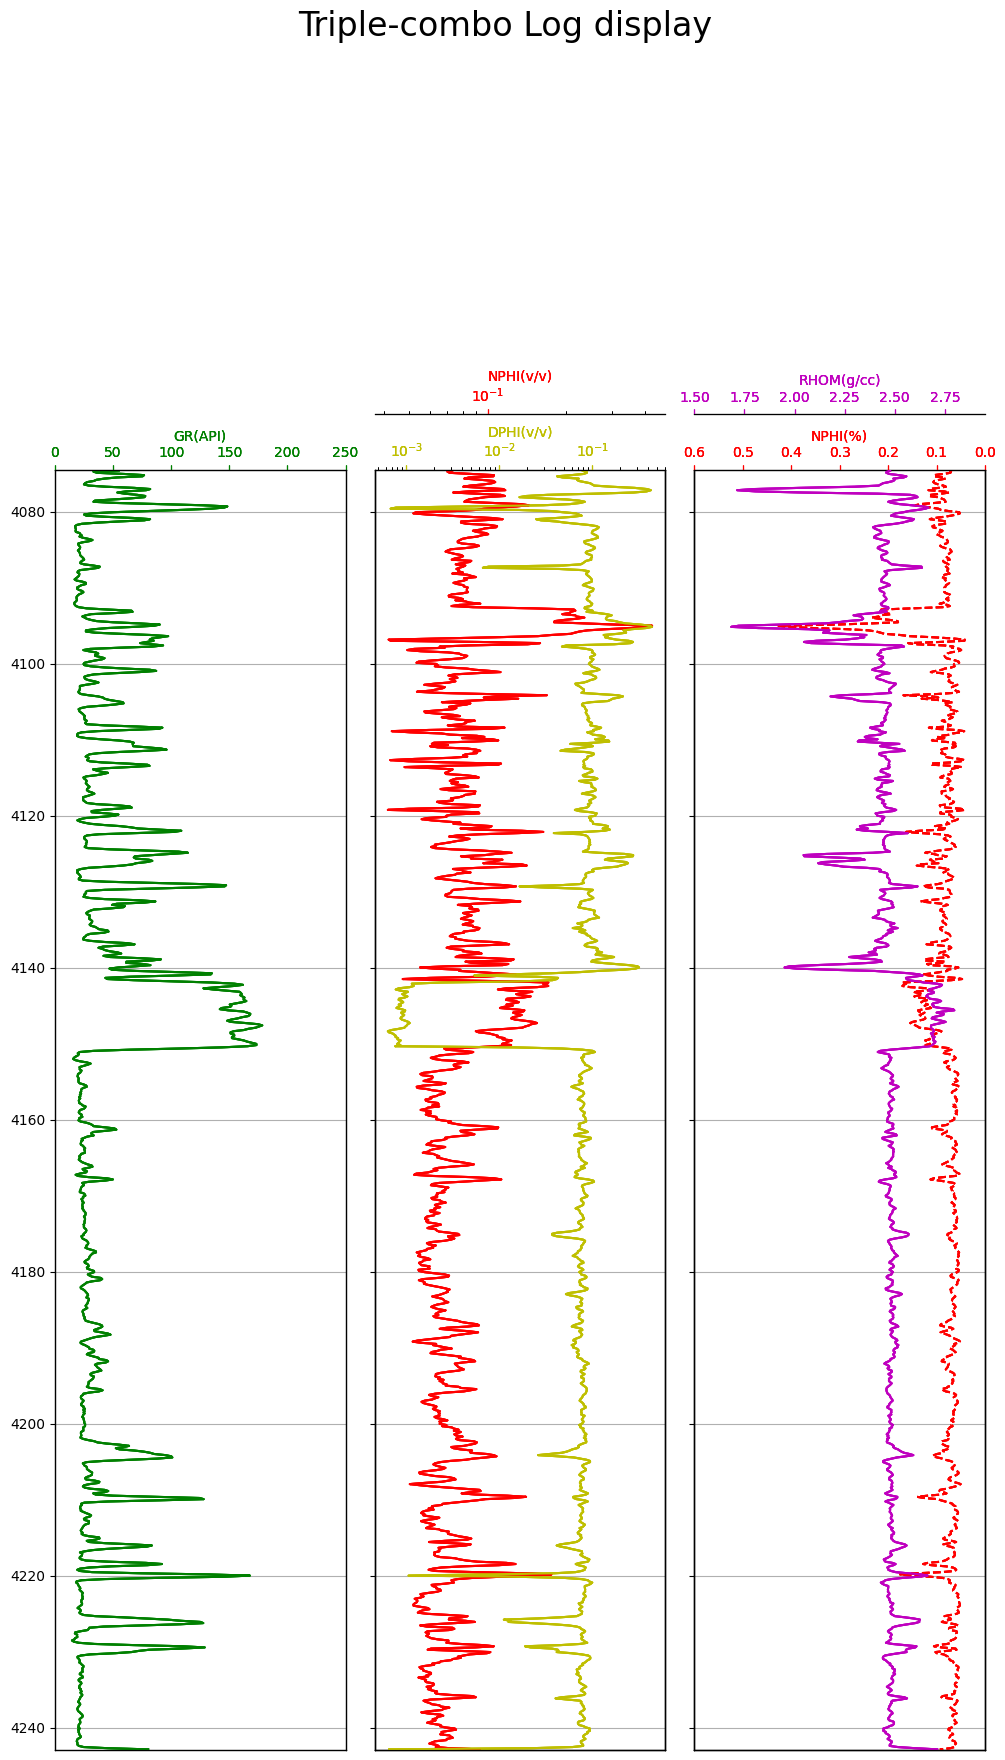

In [136]:
top_depth = 4242.9 
bottom_depth=4074.5
triple_combo_zone(4074.5, 4242.9)
plt.savefig('Triple_combo_zone.png', dpi=250)

In [ ]:
Rwa = 0.08 # water restivity from drill stem test
a = 1
m = 2
n = 2 

In [ ]:
def sw_archie(Rw, Rt, PHIE, a, m, n):
    F = a /(PHIE**m)
    Swa = (F * Rw/Rt)**(1/n)
    return Swa

In [ ]:
Rw = Rwa
logs['Swa'] = sw_archie(Rw, logs.RESD, logs.PHIEXND_gas_cor, a, m, n).clip(0,1)
logs['Swa'].describe()

C:\Users\manas\AppData\Local\Temp\ipykernel_9200\1845055356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['Swa'] = sw_archie(Rw, logs.RESD, logs.PHIEXND_gas_cor, a, m, n).clip(0,1)


count    1105.000000
mean        0.610805
std         0.232056
min         0.119801
25%         0.446180
50%         0.638424
75%         0.741367
max         1.000000
Name: Swa, dtype: float64

In [ ]:
logs.columns

Index(['DEPTH', 'CALI', 'DT', 'GR', 'RHOM', 'RESS', 'RESD', 'NEUT', 'VP', 'VS',
       'PHIDE', 'PHINE', 'PHIEXND', 'PHIEXND_gas_cor', 'Swa'],
      dtype='object')

In [ ]:
# Constants for Gamma Ray (GR) log method
GR_min = logs['GR'].min()  # Minimum Gamma Ray value
GR_max = logs['GR'].max()  # Maximum Gamma Ray value

# Calculate Volume of Shale (Vsh) using Gamma Ray (GR) log method
logs['Vsh_GR'] = (logs['GR'] - GR_min) / (GR_max - GR_min)

# Display the DataFrame with Vsh_GR
print(logs[['DEPTH', 'GR', 'Vsh_GR']])


           DEPTH       GR    Vsh_GR
25206  4074.5664  54.9105  0.246185
25207  4074.7188  33.0923  0.112915
25208  4074.8712  36.3583  0.132864
25209  4075.0236  59.6827  0.275335
25210  4075.1760  76.6474  0.378960
...          ...      ...       ...
26306  4242.2064  19.3224  0.028805
26307  4242.3588  20.5530  0.036321
26308  4242.5112  24.6420  0.061298
26309  4242.6636  45.5051  0.188735
26310  4242.8160  80.1473  0.400338

[1105 rows x 3 columns]


C:\Users\manas\AppData\Local\Temp\ipykernel_9200\1464169218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['Vsh_GR'] = (logs['GR'] - GR_min) / (GR_max - GR_min)


In [ ]:
# # logs['Sw_Archie'] = (a * logs['RESS'] / (logs['PHIEXND_gas_cor'] ** m * Rw)) ** (1/n)

# logs['Reservoir_Flag'] = ((logs['Vsh_GR'] <= 0.4) & (logs['Swa'] <= 0.65)).astype(int)

# print(logs[['DEPTH', 'PHIEXND_gas_cor',  'RESS', 'Sw_Archie', 'Vsh_GR', 'Reservoir_Flag','Swa']])
# logs.columns

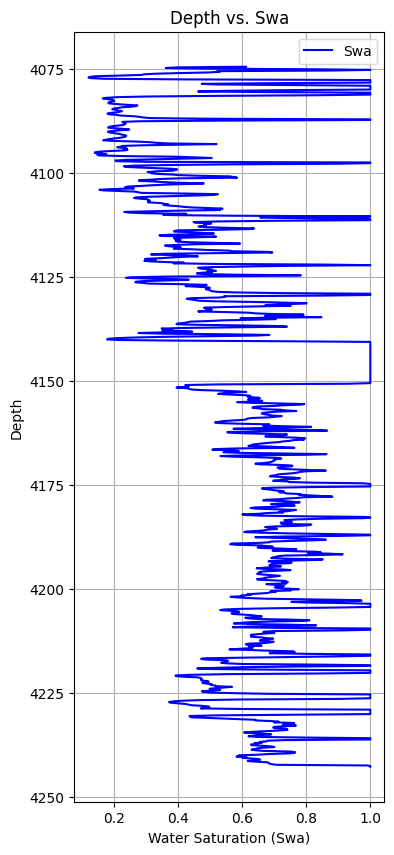

In [ ]:
plt.figure(figsize=(4, 10))
plt.plot(logs['Swa'], logs['DEPTH'], label='Swa', color='blue')


plt.xlabel('Water Saturation (Swa)')
plt.ylabel('Depth')
plt.title('Depth vs. Swa')
plt.gca().invert_yaxis()  

plt.grid(True)
plt.legend()
plt.savefig('water saturation', dpi=250)

plt.show()

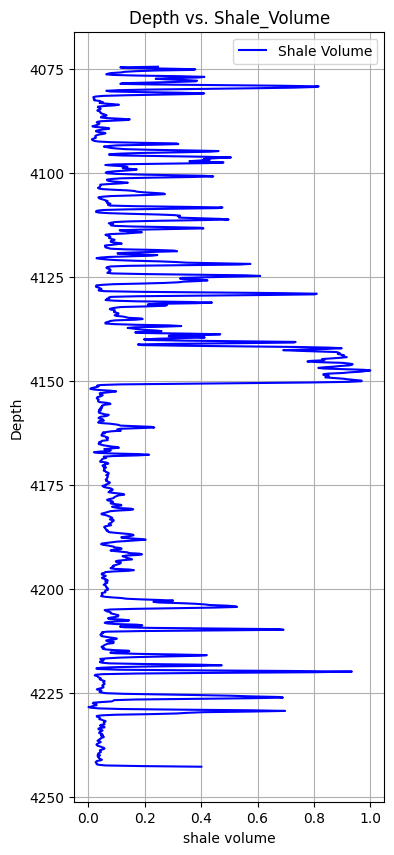

In [ ]:
plt.figure(figsize=(4, 10))
plt.plot(logs['Vsh_GR'], logs['DEPTH'], label='Shale Volume', color='blue')


plt.xlabel('shale volume')
plt.ylabel('Depth')
plt.title('Depth vs. Shale_Volume')
plt.gca().invert_yaxis()  

plt.grid(True)
plt.legend()
plt.savefig('Shale Volume', dpi=250)


plt.show()

In [ ]:
logs['PHIEXND_gas_cor'].describe()

count    1105.000000
mean        0.083629
std         0.046050
min         0.000636
25%         0.072537
50%         0.079927
75%         0.091606
max         0.440651
Name: PHIEXND_gas_cor, dtype: float64

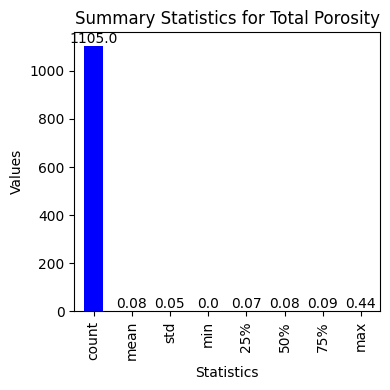

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs['PHIEXND_gas_cor'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='blue')

# Adding labels and title
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Summary Statistics for Total Porosity')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('poro_describe_plot.png', dpi=250)

plt.show()


In [ ]:
logs['Vsh_GR'].describe()

count    1105.000000
mean        0.172863
std         0.215750
min         0.000000
25%         0.050583
50%         0.078495
75%         0.181159
max         1.000000
Name: Vsh_GR, dtype: float64

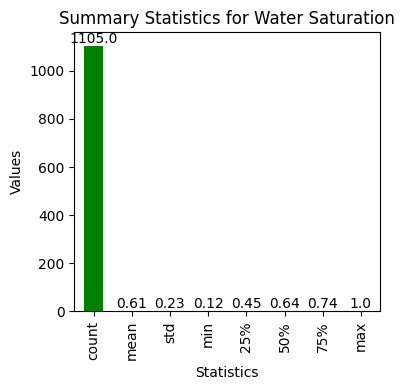

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs['Swa'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='green')

# Adding labels and title
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Summary Statistics for Water Saturation')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('Swa_describe_plot.png', dpi=250)

plt.show()


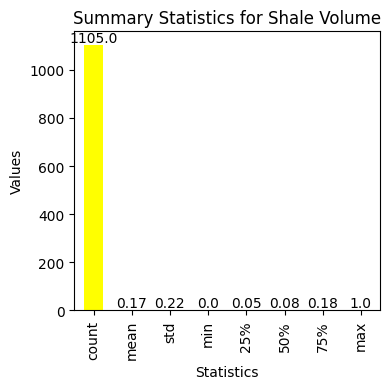

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs['Vsh_GR'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='yellow')

# Adding labels and title
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Summary Statistics for Shale Volume')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('VSH_describe_plot.png', dpi=250)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'logs' is your DataFrame
logs['Reservoir_Flag'] = 0  # Initialize all values to 0

# Set Reservoir_Flag to 1 where conditions are met
logs.loc[(logs['Vsh_GR'] <= 0.4) & (logs['Swa'] <= 0.65), 'Reservoir_Flag'] = 1

# Print the DataFrame to verify the new column
print(logs[['DEPTH', 'Vsh_GR', 'Swa', 'Reservoir_Flag']])

# Save the DataFrame with the new column
logs.to_csv('logs_with_reservoir_flag.csv', index=False)


           DEPTH    Vsh_GR       Swa  Reservoir_Flag
25206  4074.5664  0.246185  0.611944               1
25207  4074.7188  0.112915  0.400790               1
25208  4074.8712  0.132864  0.361211               1
25209  4075.0236  0.275335  0.477876               1
25210  4075.1760  0.378960  0.824867               0
...          ...       ...       ...             ...
26306  4242.2064  0.028805  0.692241               0
26307  4242.3588  0.036321  0.707499               0
26308  4242.5112  0.061298  0.991756               0
26309  4242.6636  0.188735  1.000000               0
26310  4242.8160  0.400338  1.000000               0

[1105 rows x 4 columns]


C:\Users\manas\AppData\Local\Temp\ipykernel_9200\13829667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['Reservoir_Flag'] = 0  # Initialize all values to 0


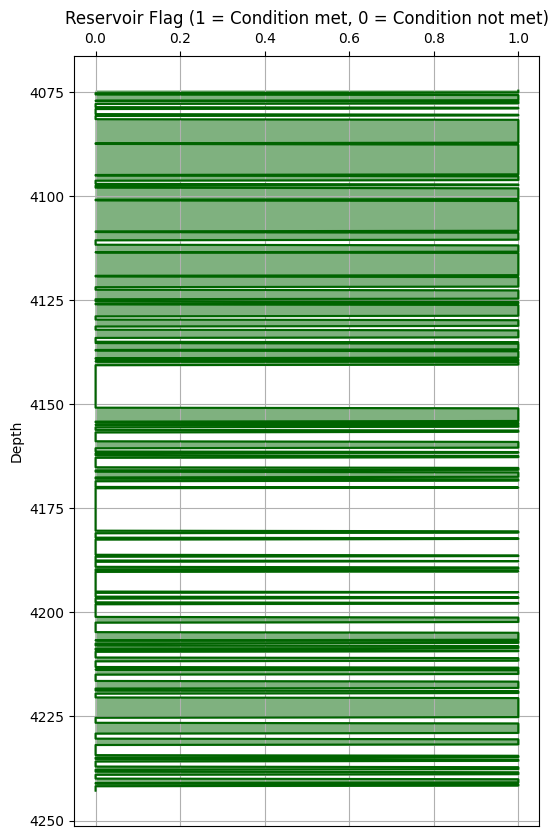

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Reservoir Flag
plt.figure(figsize=(6, 10))
ax = plt.gca()
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.invert_yaxis()
plt.grid()

# Plotting the Reservoir Flag as a line
plt.plot(logs['Reservoir_Flag'], logs['DEPTH'], color='darkgreen')

# Filling the area where the condition is met with color
plt.fill_betweenx(logs['DEPTH'], logs['Reservoir_Flag'], color='darkgreen', alpha=0.5)

# Adding labels and title
plt.ylabel("Depth")
plt.title("Reservoir Flag (1 = Condition met, 0 = Condition not met)")
plt.savefig('Flag.png', dpi=250)

plt.show()
